In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.graph_objects as go

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dataset = pd.read_excel(r"/content/drive/MyDrive/dataset (1).xlsx")

In [4]:
dataset.head()

,Gender,Age,HGB,Thrombocytes,leukocytes,Neutrophil,Eosinophil,Basophil,Lymphocyte,Monocyte,class
0,1,18,11.059731,1.822574,7.926262,67,4,0,23,5,1
1,1,9,11.765051,3.434512,5.665930,51,4,2,18,2,1
2,1,9,12.079882,3.045226,7.694035,63,1,2,24,8,1
3,1,6,12.569072,2.656899,9.483313,62,3,2,35,7,1
4,1,18,12.786164,3.980141,8.905467,47,4,1,29,4,1


In [6]:
# Summary statistics of numerical variables
print(dataset.describe())


            Gender          Age          HGB  Thrombocytes   leukocytes  \
count  4500.000000  4500.000000  4500.000000   4500.000000  4500.000000   
mean      0.500000    40.924444    12.697478      2.991276     7.620861   
std       0.500056    28.444040     4.081254      1.728073     2.124551   
min       0.000000     1.000000     2.000644      0.000827     3.020383   
25%       0.000000    14.000000    11.052484      1.355022     5.995043   
50%       0.500000    39.000000    12.888175      2.952695     7.578554   
75%       1.000000    67.000000    16.450487      4.594175     9.141386   
max       1.000000    90.000000    17.998663      5.999325    13.494130   

        Neutrophil   Eosinophil     Basophil   Lymphocyte     Monocyte  \
count  4500.000000  4500.000000  4500.000000  4500.000000  4500.000000   
mean     55.430889     3.839111     1.230222    27.778444     6.464444   
std      11.788982     2.107339     1.227554     8.903450     3.067490   
min      30.000000     1.000

In [7]:
# Information about the dataset including data types and missing values
print(dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4500 entries, 0 to 4499
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Gender        4500 non-null   int64  
 1   Age           4500 non-null   int64  
 2   HGB           4500 non-null   float64
 3   Thrombocytes  4500 non-null   float64
 4   leukocytes    4500 non-null   float64
 5   Neutrophil    4500 non-null   int64  
 6   Eosinophil    4500 non-null   int64  
 7   Basophil      4500 non-null   int64  
 8   Lymphocyte    4500 non-null   int64  
 9   Monocyte      4500 non-null   int64  
 10  class         4500 non-null   int64  
dtypes: float64(3), int64(8)
memory usage: 386.8 KB
None


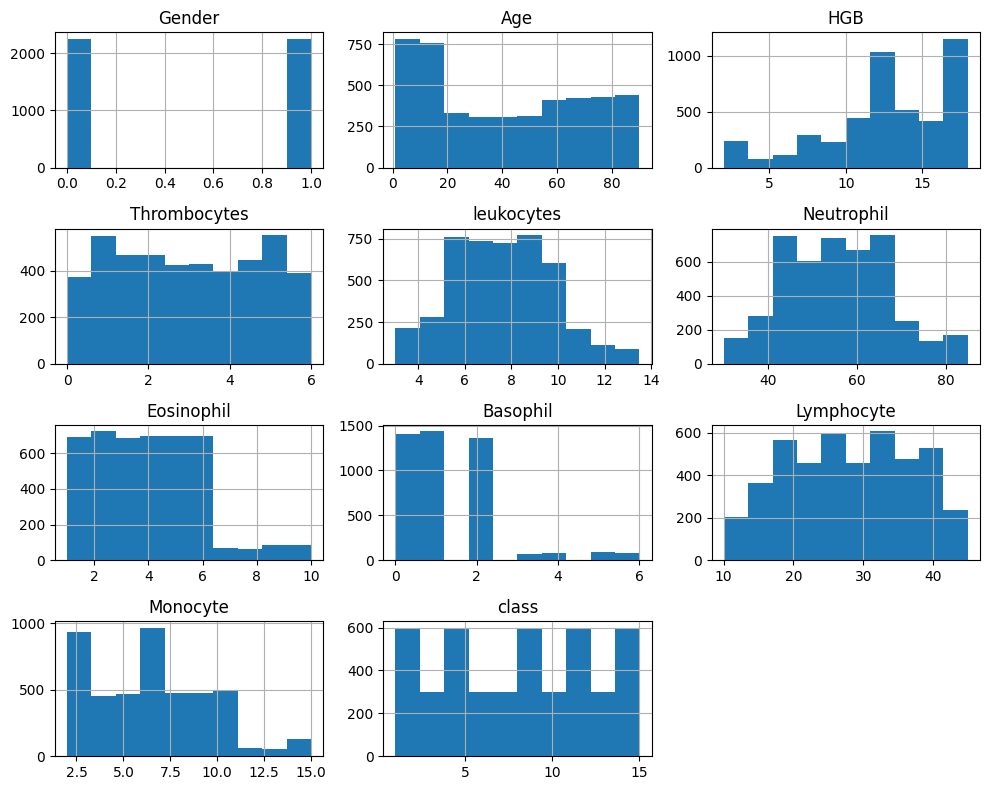

In [8]:
# Visualizing distributions of numerical variables using histograms
dataset.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

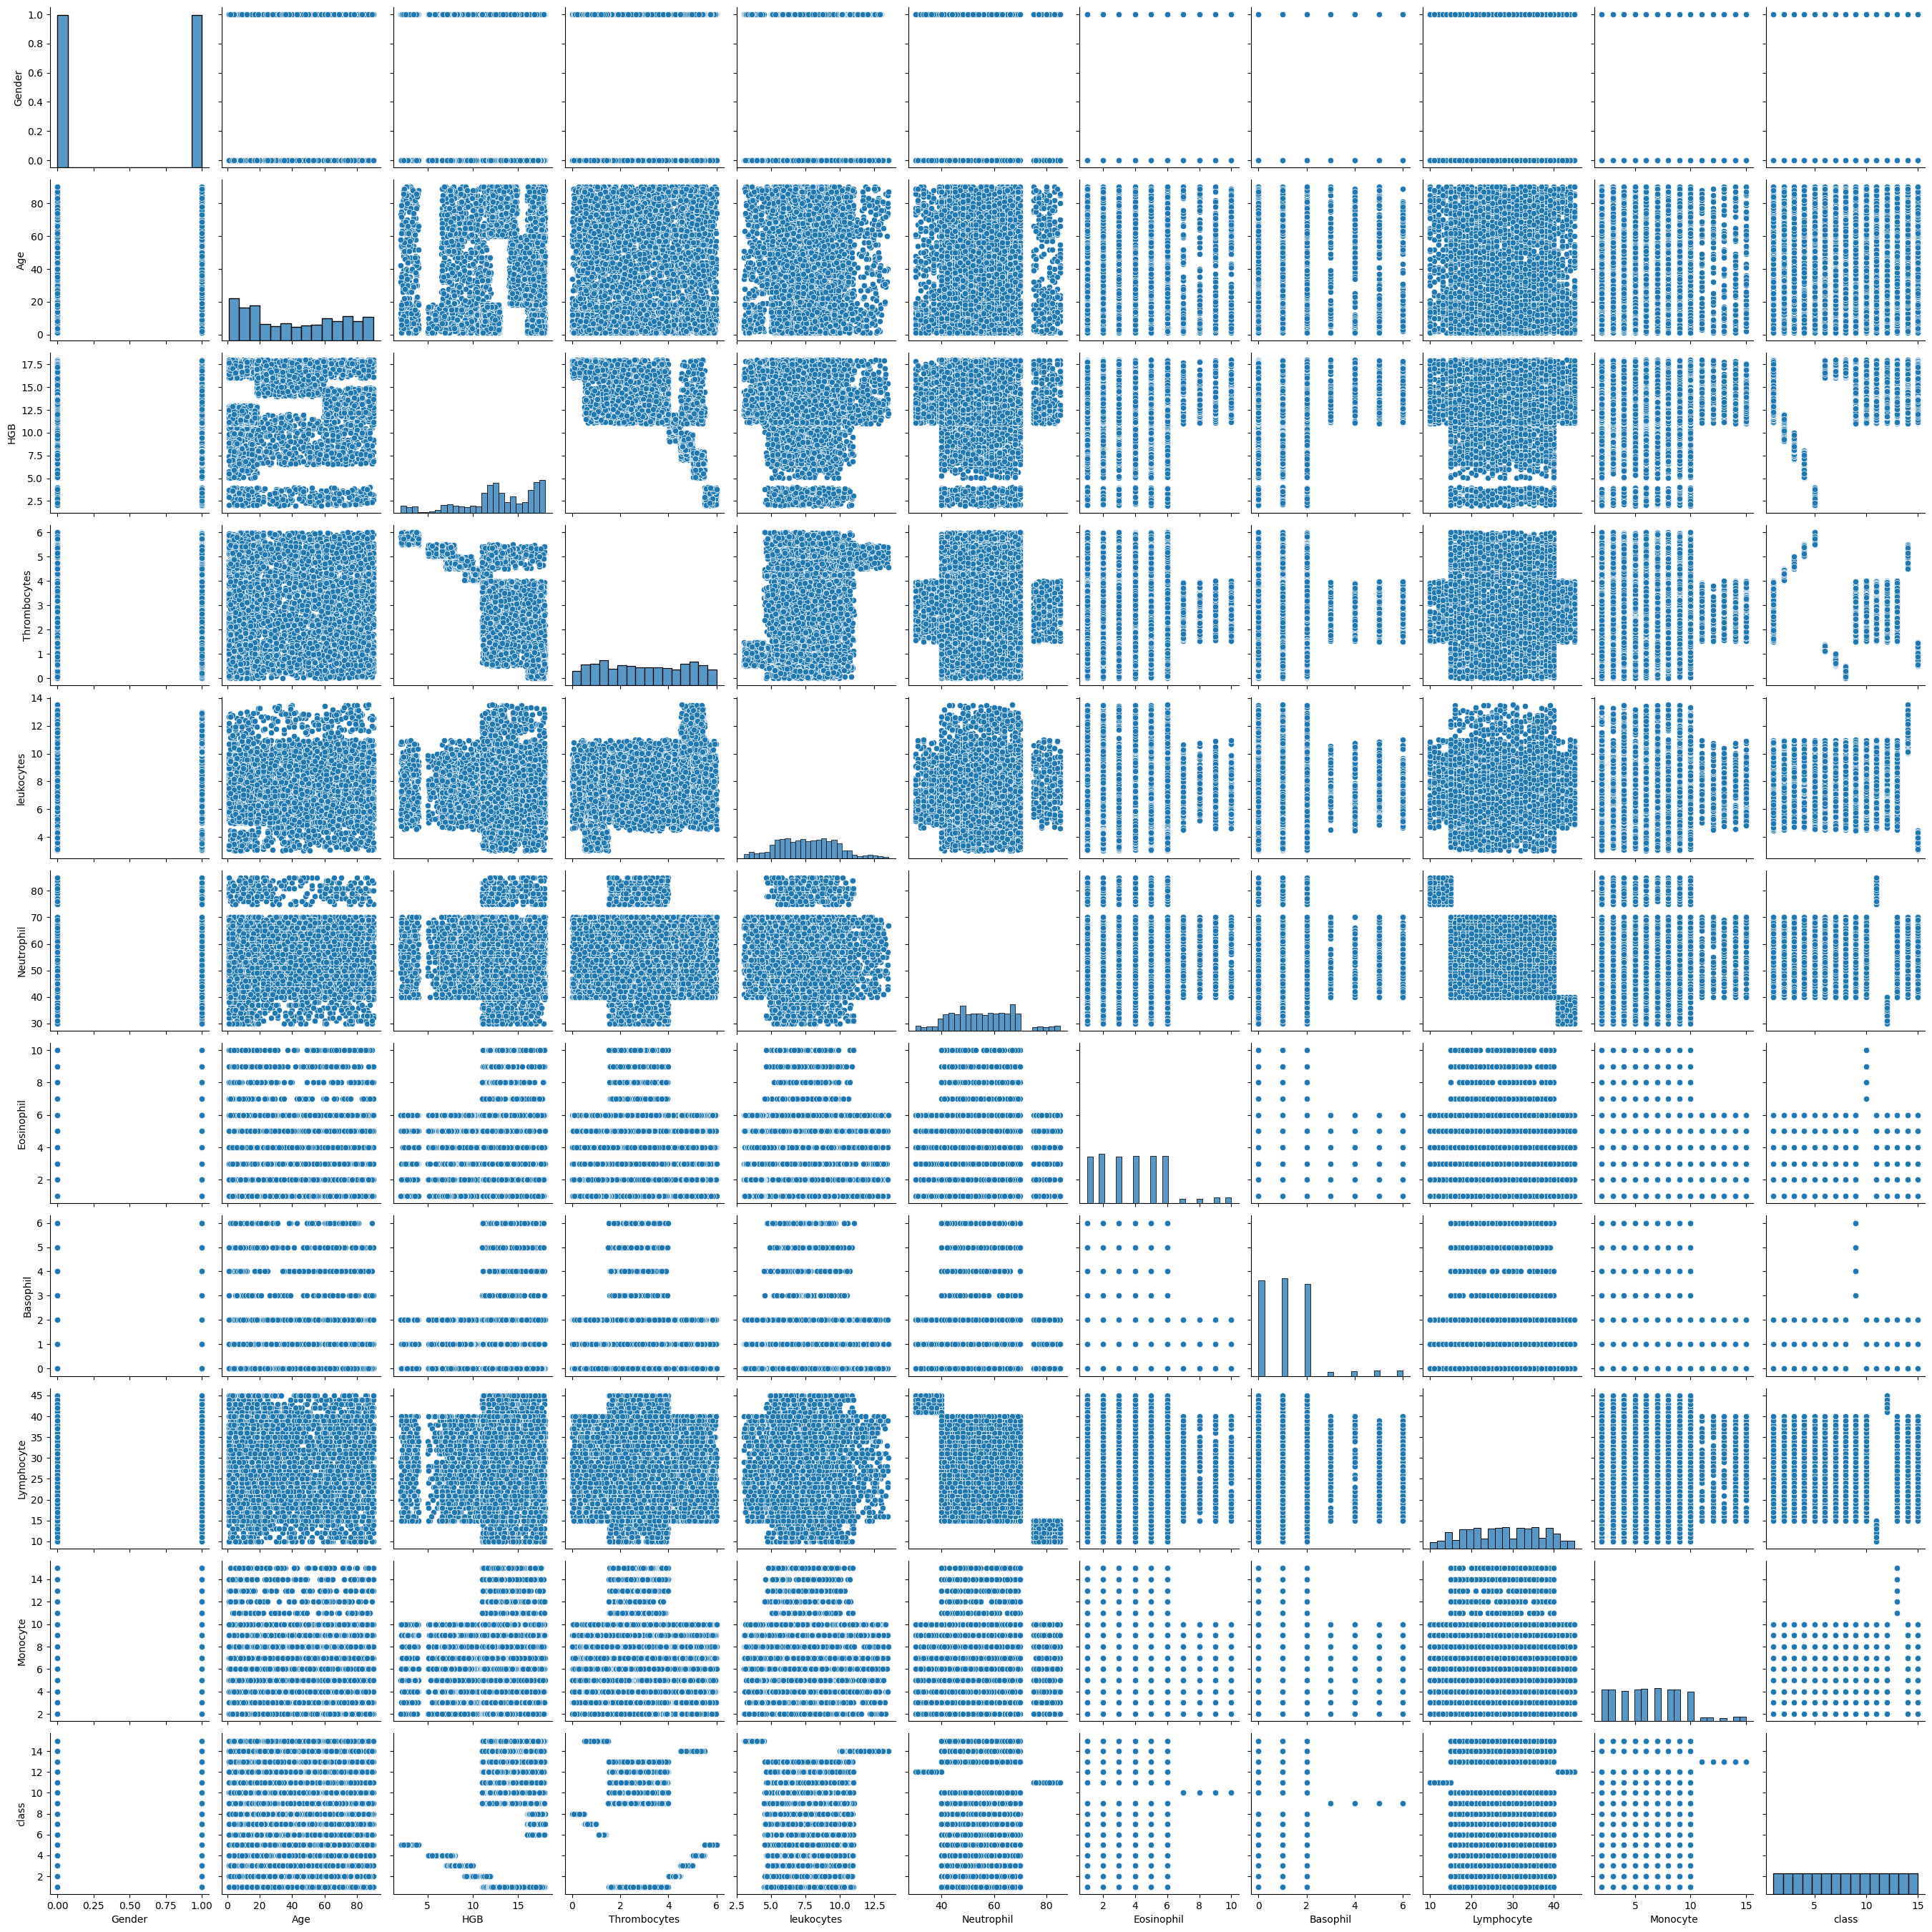

In [9]:
# Visualizing relationships between numerical variables using pairplot
sns.pairplot(dataset)
plt.show()


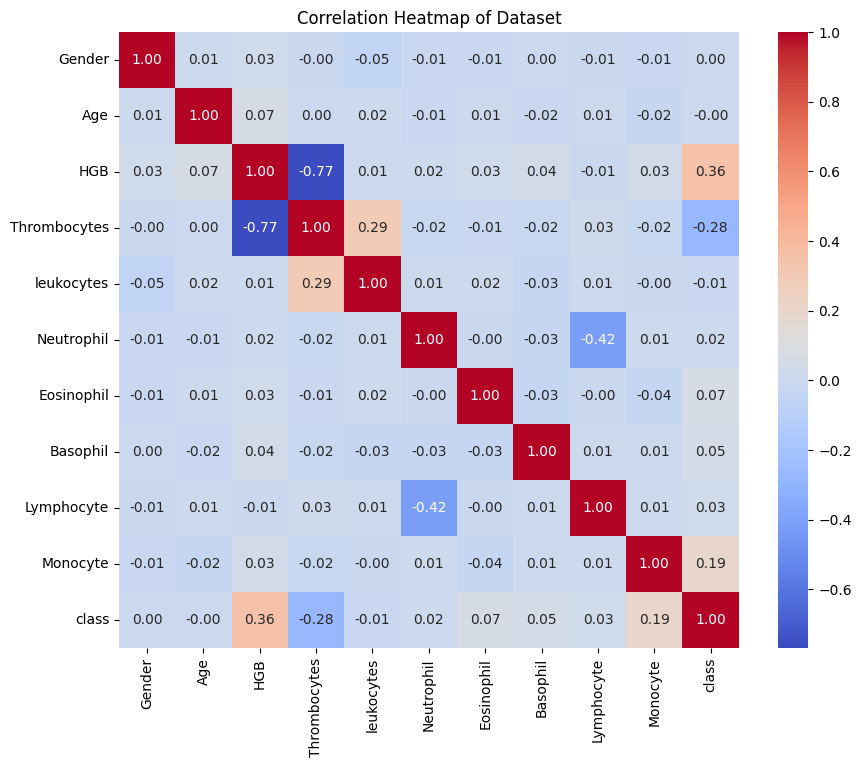

In [10]:
# Correlation heatmap to identify relationships between numerical variables
correlation_matrix = dataset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Dataset')
plt.show()


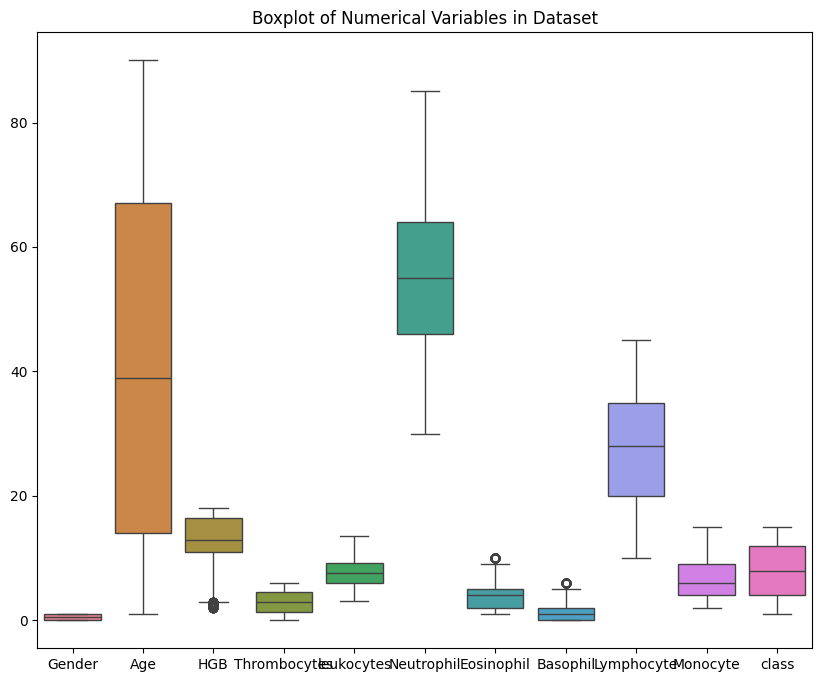

In [11]:
# Boxplot to identify outliers in numerical variables
plt.figure(figsize=(10, 8))
sns.boxplot(data=dataset)
plt.title('Boxplot of Numerical Variables in Dataset')
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [14]:
X = dataset.drop("class",axis=1)
y = dataset['class']

In [15]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.3, random_state=20)

In [16]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((3150, 10), (1350, 10), (3150,), (1350,))

In [17]:
y

0        1
1        1
2        1
3        1
4        1
        ..
4495    15
4496    15
4497    15
4498    15
4499    15
Name: class, Length: 4500, dtype: int64

In [18]:
from sklearn.datasets import make_classification
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB

from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np


In [19]:
models = {
    "SVC": SVC(kernel='linear'),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    'GradientBoosting': GradientBoostingClassifier(n_estimators=100, random_state=42),
    "KNeighbors": KNeighborsClassifier(n_neighbors=5),
    "MultinomialNB": MultinomialNB()
}

for model_name, model in models.items():
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)

    accuracy = accuracy_score(y_test, predictions)

    cm = confusion_matrix(y_test, predictions)

    print(f"{model_name} accuracy: {accuracy}")
    print(f"{model_name} Confusion Matrix:")
    print(np.array2string(cm, separator=''))


SVC accuracy: 0.9866666666666667
SVC Confusion Matrix:
[[91 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [ 091 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [ 0 398 1 0 0 0 0 0 0 0 0 0 0 0]
 [ 0 0 098 0 0 0 0 0 0 0 0 0 0 0]
 [ 0 0 0 096 0 0 0 0 0 0 0 0 0 0]
 [ 0 0 0 0 083 0 0 0 0 0 0 0 0 0]
 [ 0 0 0 0 0 085 7 0 0 0 0 0 0 1]
 [ 0 0 0 0 0 0 085 0 0 0 0 0 0 0]
 [ 0 0 0 0 0 0 0 097 0 0 0 0 0 0]
 [ 1 0 0 0 0 1 0 0 088 0 0 0 0 0]
 [ 0 0 0 0 0 0 0 0 0 086 0 0 0 0]
 [ 1 0 0 0 0 0 0 0 0 0 070 0 0 0]
 [ 1 0 0 0 0 0 0 0 0 0 0 085 0 0]
 [ 0 0 0 0 0 0 0 0 0 0 0 0 091 0]
 [ 0 0 0 0 0 0 0 0 0 0 0 0 0 088]]
RandomForest accuracy: 1.0
RandomForest Confusion Matrix:
[[ 92  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [  0 92  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [  0  0102  0  0  0  0  0  0  0  0  0  0  0  0]
 [  0  0  0 98  0  0  0  0  0  0  0  0  0  0  0]
 [  0  0  0  0 96  0  0  0  0  0  0  0  0  0  0]
 [  0  0  0  0  0 83  0  0  0  0  0  0  0  0  0]
 [  0  0  0  0  0  0 93  0  0  0  0  0  0  0  0]
 [  0  0  0  0  0  0  0 85  0  0 

In [20]:
svc = SVC(kernel='linear')
svc.fit(X_train,y_train)
ypred = svc.predict(X_test)
accuracy_score(y_test,ypred)

0.9866666666666667

In [21]:
import pickle
pickle.dump(svc,open("svc.pkl",'wb'))

In [22]:
svc = pickle.load(open("svc.pkl",'rb'))

In [23]:
svc.predict(X_test.iloc[10].values.reshape(1,-1))

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([14])